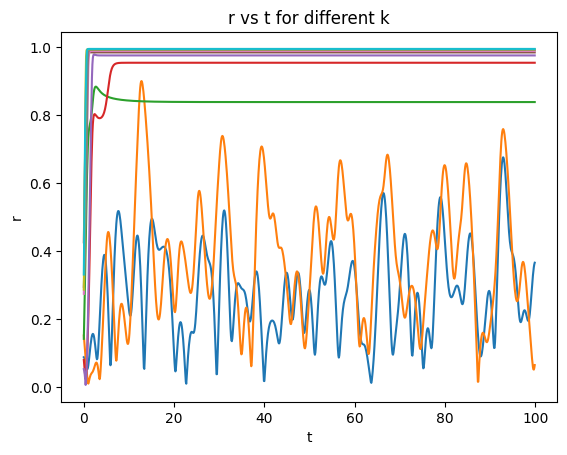

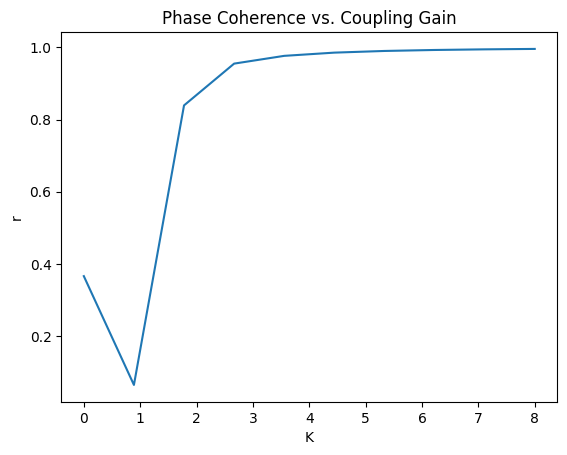

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import os
from PIL import Image

# Parameters

n = 10                              # Number of oscillators
dt = 0.1                             # Time step
tmax = 100                              # Total time per K
num_K = 10                          # Number of K values to test
K_values = np.linspace(0, 8, num_K)  # Range of K
omega = np.random.normal(0, 1, n) # normal distribution with (mean,std_dev,no.)

r_valuesfor_k = []
for K in K_values:
    theta_vals = []
    # Initialize phases randomly between 0 and 2*pi
    theta = np.random.uniform(0,1,n) * 2 * np.pi
    time_steps = int(tmax / dt)
    psi_vals = []
    r_vals = [] #phase coherence values for each K
    time_values =[]
    
    # Evolve the system
    for t in range(time_steps):
        interaction = np.sum(np.sin(theta - theta[:, None]), axis=1)
        theta += (omega + (K / n) * interaction) * dt
    
         # Calculate coherence r as the average of last few steps
        coherence_vector = np.mean(np.exp(1j * theta))
        r = abs(coherence_vector)
        psi = np.mean(theta)
        r_vals.append(r)
        psi_vals.append(psi)
        time_values.append(t*dt)
        theta_vals.append(theta)

    coherence_vectorfor_k = np.mean(np.exp(1j * theta))
    rfor_k = abs(coherence_vector)
    r_valuesfor_k.append(r)

    # plto of r vs t for K
    plt.plot(time_values,r_vals)

# r vs t
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t for different k")
plt.show()

# Plotting r vs. K
plt.plot(K_values, r_valuesfor_k)
plt.xlabel('K')
plt.ylabel('r')
plt.title('Phase Coherence vs. Coupling Gain')
plt.show()


In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import os
from PIL import Image

In [141]:
n = 10                             # Number of oscillators
dt = 0.1                             # Time step
tmax = 100                              # Total time per K
num_K = 10                           # Number of K values to test
K_values = np.linspace(0, 8, num_K)  # Range of K
omega = np.random.normal(0, 1, n) # normal distribution with (mean,std_dev,no.)
K = 8

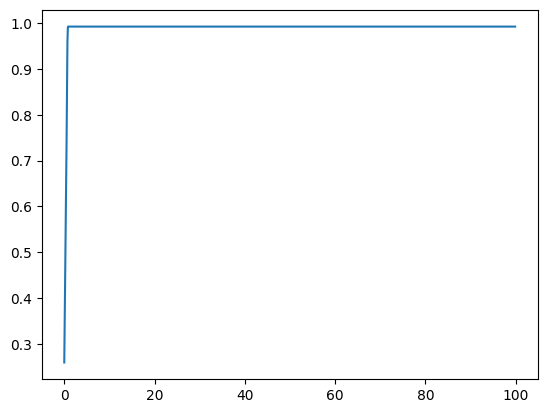

In [142]:

# Initialize phases randomly between 0 and 2*pi
theta = np.random.uniform(0,1,n) * 2 * np.pi
time_steps = int(tmax / dt)
theta_vals = np.zeros((time_steps,n))
psi_vals = []
r_vals = [] #phase coherence values for each K
time_values =[]
it = 0
for t in range(time_steps):
    interaction = np.sum(np.sin(theta - theta[:, None]), axis=1)
    theta += (omega + (K / n) * interaction) * dt

        # Calculate coherence r as the average of last few steps
    coherence_vector = np.mean(np.exp(1j * theta))
    r = abs(coherence_vector)
    psi = np.mean(theta)
    r_vals.append(r)
    psi_vals.append(psi)
    time_values.append(t*dt)
    theta_vals[it] = theta
    it+=1

coherence_vectorfor_k = np.mean(np.exp(1j * theta))
rfor_k = abs(coherence_vector)
#r_valuesfor_k.append(r)

# plto of r vs t for K
plt.plot(time_values,r_vals)

In [143]:
for i in range(0, int(tmax/dt), int(1/dt)):
    for j in range(n):
        plt.plot(np.cos(theta_vals[i][j]), np.sin(theta_vals[i][j]), marker='o', color='teal', markersize=10)  # Red circles

    circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2)  # Black circle with thicker line
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.add_artist(circle)
    plt.title("Timestep = {}".format(i), fontsize=14, fontweight='bold')  # Larger, bolder title
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.grid(True, color='lightgray', linestyle='--')  # Light gray, dashed grid lines

    file = os.path.join('osc_plot', "coupled_osc_%.8i.png" % (i + 1))
    plt.savefig(file)
    plt.close("all")
    files.append(file)

In [144]:
def save_gif_PIL(output, files, fps, loop):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=output, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

In [145]:
save_gif_PIL("osc_gif/8.gif", files, fps=100, loop=0)

In [146]:
from IPython.display import Image

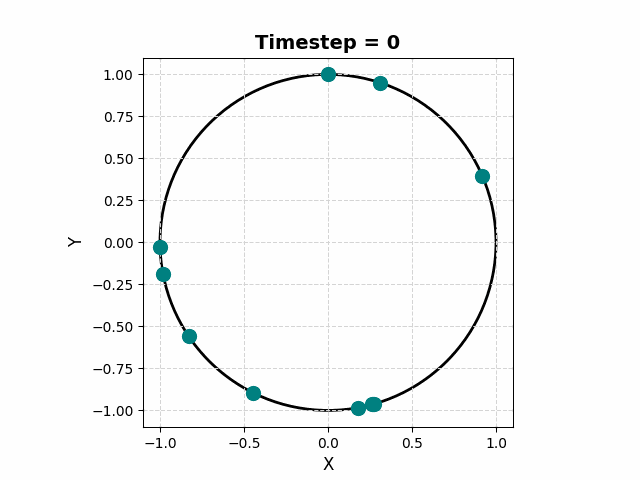

In [147]:
Image(filename=os.path.join('osc_gif','8.gif')) 